# Plotting and masking with Sentinel-2 data

Jason MacDonald  
UW Geospatial Data Analysis  
CEE467/CEWA567  
credit to: David Shean  

## Access images

In [2]:
import os
import urllib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import rasterio as rio
import rasterio.plot

In [4]:
#Useful package to add dynamic scalebar to matplotlib images
from matplotlib_scalebar.scalebar import ScaleBar

In [5]:
#May want to use interactive plotting for zoom/pan and live coordinate display
#%matplotlib widget
#%matplotlib inline

In [6]:
pwd

'/home/jovyan/project/chelanigans'

In [7]:
notebook = 'chelan_1_window_bounds_2021'
path = '/home/jovyan/project/chelanigans/output/%s' %notebook
isExist = os.path.exists(path)
if not isExist:

   # Create a new directory because it does not exist
   os.makedirs(path)

In [6]:
#Set path to local directory with downloaded images

imgdir = '/home/jovyan/project/chelanigans/data_sample'

In [7]:
## Pre-identified cloud-free Image IDs used for the lab
# PNW 2021 heatwave June 26 - July 2

#pre-heatwave 

#date = 'April 17, 2021'  #SENTINEL
#img_id1 = 'HLS.S30.T10UFU.2021107T185909.v2.0'
# April 20, 2021 
#img_id1 = 'HLS.L30.T10UFU.2021110T185454.v2.0' #landsat
#date = 'May 22, 2021'
img_id1 = 'HLS.S30.T10UFU.2021142T185921.v2.0'
#date = 'June 1st, 2021'
#img_id1 = 'HLS.S30.T10UFU.2021152T185921.v2.0'

#post-heatwave 

#date = 'July 6th, 2021'
#img_id2 = 'HLS.S30.T10UFU.2021187T185919.v2.0'
#date = 'July 11th, 2021'
#img_id2 = 'HLS.S30.T10UFU.2021192T185921.v2.0'
#date = 'July 18th, 2021'
#img_id2 = 'HLS.L30.T10UFU.2021199T184900.v2.0' #landsat
# July 25th, 2021 
#img_id2 = 'HLS.L30.T10UFU.2021206T185515.v2.0' #landsat
date = 'September 24th, 2021'
img_id2 = 'HLS.S30.T10UFU.2021267T190029.v2.0'


In [9]:
#Define image to use (can set this to switch to pre/post heatwave image
img = img_id2

In [8]:
#Scale and offset values for L2 Landsat products

# are these same/similar for Sentinel-2?
# check metadata for values



#Surface Reflectance 0.0000275 + -0.2
sr_scale = 0.0000275
sr_offset = -0.2
#Surface Temperature 0.00341802 + 149.0
st_scale = 0.00341802
st_offset = 149.0

In [10]:
#Specify filenames for different bands

#Red
#r_fn = os.path.join(imgdir, img+'_SR_B4.TIF')
r_fn = os.path.join(imgdir, img+'.B04.tif')

#Green
#g_fn = os.path.join(imgdir, img+'_SR_B3.TIF')
g_fn = os.path.join(imgdir, img+'.B03.tif')

#Blue
#b_fn = os.path.join(imgdir, img+'_SR_B2.TIF')
b_fn = os.path.join(imgdir, img+'.B02.tif')

#Near-Infrared (NIR08)
#nir_fn = os.path.join(imgdir, img+'_SR_B5.TIF')
nir_fn = os.path.join(imgdir, img+'.B08.tif')

#Shortwave-Infrared (SWIR16)
#swir_fn = os.path.join(imgdir, img+'_SR_B6.TIF')
swir_fn = os.path.join(imgdir, img+'.B11.tif')

### Fetch Panchromatic band from Google Cloud archive (not available from MS Planetary Computer)

In [11]:
!pip install earthaccess

In [61]:
import earthaccess

auth = earthaccess.login(strategy="netrc")
if not auth:
    auth = earthaccess.login(strategy="interactive", persist=True)
# run single line below first time
#auth = earthaccess.login(strategy="interactive", persist=True)

We are already authenticated with NASA EDL


In [63]:
#Sentinel-2
base_url = 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020'
#full_url = 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T10UFU.2021362T190811.v2.0/HLS.S30.T10UFU.2021362T190811.v2.0.B02.tif'

#landsat
#base_url = 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020'  
#full_url = 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T10UFU.2022001T185530.v2.0/HLS.L30.T10UFU.2022001T185530.v2.0.B02.tif'

img_list = (img_id2, img_id1)
band_list = ('02', '03', '04', '05', '06', '07', '08', '09', '10', '11') 

#Loop through all selected images and bands
for img in img_list:
    for b in band_list:
    #Generate the appropriate URL for the images we identified
        image_url =  '{0}/{1}/{1}.B{2}.tif'.format(base_url, img, b)    
        print(image_url)
    #Local filename
        out_fn = os.path.join(imgdir, os.path.split(image_url)[-1])
    #Check to see if file already exists
    if not os.path.exists(out_fn):
        print("Saving:", out_fn)
        
        
        
        #Download the file
        #figure out authorization here
        urllib.request.urlretrieve(image_url, out_fn)

https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T10UFU.2021267T190029.v2.0/HLS.S30.T10UFU.2021267T190029.v2.0.B02.tif
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T10UFU.2021267T190029.v2.0/HLS.S30.T10UFU.2021267T190029.v2.0.B03.tif
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T10UFU.2021267T190029.v2.0/HLS.S30.T10UFU.2021267T190029.v2.0.B04.tif
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T10UFU.2021267T190029.v2.0/HLS.S30.T10UFU.2021267T190029.v2.0.B05.tif
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T10UFU.2021267T190029.v2.0/HLS.S30.T10UFU.2021267T190029.v2.0.B06.tif
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T10UFU.2021267T190029.v2.0/HLS.S30.T10UFU.2021267T190029.v2.0.B07.tif
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T10UFU.202126

In [14]:
#Panchromatic (B08)
# no panchromatic band for sentinel-2
#p_fn = os.path.join(imgdir, img_id1+'.B08.tif')

In [15]:
#Sanity check
#Leave these Datasets open for use later in lab (e.g., extracting resolution)
#p_src = rio.open(p_fn)
#print("Pan", p_src.profile)
r_src = rio.open(r_fn)
print("MS", r_src.profile)

MS {'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9999.0, 'width': 3660, 'height': 3660, 'count': 1, 'crs': CRS.from_wkt('PROJCS["UTM Zone 10, Northern Hemisphere",GEOGCS["Unknown datum based upon the WGS 84 ellipsoid",DATUM["Not specified (based on WGS 84 spheroid)",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(30.0, 0.0, 600000.0,
       0.0, -30.0, 5400000.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


Note the width and height values for 15 m Pan band - these are different than the 30 m products for the same image

## Part 5: Raster window extraction

## Rasterio window
* Instead of array indexing, we can use the built-in `rasterio.windows.Window` functionality
    * This is really valuable when you only want to load a small portion of a large dataset that is too big to fit into available RAM
        * With array indexing, we must load the entire array into memory and then extract the desired window
        * With the rasterio window, we never have to load the full array
    * https://rasterio.readthedocs.io/en/latest/topics/windowed-rw.html
    * Syntax is `rasterio.windows.Window(col_offset, row_offset, width, height)`
* Let's define 1024x1024 px windows around Mt. Rainer and Seattle

In [16]:
import rasterio.windows

#These are windows for Pan band, need to scale for others

#Lake Chelan
#window = rasterio.windows.Window(1750, 1000, 2048, 2048)
window = rasterio.windows.Window(2400, 1500, 512, 1024)
#window = rasterio.windows.Window(2250, 1500, 512, 512)

In [17]:
#Define window bounds for Pan 
window_bounds = rasterio.windows.bounds(window, r_src.transform)
print("Window bounds: ", window_bounds)
#Define window extent
window_extent = [window_bounds[0], window_bounds[2], window_bounds[1], window_bounds[3]]
print("Window extent: ", window_extent)

Window bounds:  (672000.0, 5324280.0, 687360.0, 5355000.0)
Window extent:  [672000.0, 687360.0, 5324280.0, 5355000.0]


### Define a function to read only this subwindow into an array
* I provided sample code here, but please review so you understand each step

In [18]:
def rio2ma(fn, b=1, window=None, scale=True):
    with rio.open(fn) as src:
        #Read in the window to masked array
        a = src.read(b, window=window, masked=True)
        #If Level 2 surface reflectance and surface temperature, scale values appropriately
        if scale:
            if 'SR' in fn:
                #Output in unitless surface reflectance from 0-1
                a = a * sr_scale + sr_offset
            elif 'ST' in fn:
                #Output in degrees Celsius
                a = a * st_scale + st_offset - 273.15
            a = a.astype('float32')
        return a

In [60]:
r

masked_array(
  data=[[114.0, 84.0, 114.0, ..., 61.0, 109.0, 242.0],
        [98.0, 96.0, 91.0, ..., 138.0, 115.0, 124.0],
        [107.0, 93.0, 80.0, ..., 496.0, 477.0, 609.0],
        ...,
        [502.0, 570.0, 501.0, ..., 450.0, 573.0, 642.0],
        [609.0, 637.0, 569.0, ..., 495.0, 609.0, 464.0],
        [452.0, 432.0, 440.0, ..., 427.0, 505.0, 365.0]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=-9999.0,
  dtype=float32)

## Part 6: Contrast Enhancement
### Create a quick histogram for the window array
* This will help you visualize the range of DN values
* Remember to use the numpy masked array `compressed()` function to remove the nodata values before generating your histogram, and use enough bins to capture the true distribution without aliasing

In [19]:
#fig, ax = plt.subplots()

#ax.hist(mr_pan.compressed().ravel(), bins=256, color='violet', log=False)

#ax.set_ylabel('Number of occurences')
#ax.set_xlabel('DN values')
#ax.set_title('Histogram of DN values within Mt. Rainier window');

### Function to normalize (AKA contrast stretch) input image array values
* The input image pixel values are `UInt16` (unsigned, 16-bit integer, spanning the range 0-65535)
* We want to rescale to `float` values over the range (0.0-1.0)
    * Let's use the simple rescaling "min-max normalization" here: https://en.wikipedia.org/wiki/Feature_scaling
* So we need a function to remap the DN values from 0-65535 to 0-1
    * A robust contrast enhancement is to use the 2nd and 98th percentile DN values as the min and max values for the rescaling step:
        * The DN value of the 2nd percentile should map to 0
        * The DN value at the 98th percentile should map to 1
        * Note that we will now have some values less than 0 and some values greater than 1 in the output!
            * Optional - add a step to "clip" the remapped values, so that any values less than 0 are set to 0, and any values greater than 1 are set to 1
                * See https://numpy.org/doc/stable/reference/generated/numpy.ma.clip.html
* Your function should return a new array (with `float` dtype) and values distributed over the (0.0-1.0) range
* Take some time to think this through, discuss with others, and sanity check your output

In [20]:
def normie(data, low_perc, up_perc):
    perc = np.percentile(data.compressed(), (low_perc, up_perc)) #default (2, 98)
    normd = (data - perc[0])/(perc[1] - perc[0])
    clipd = np.clip(normd, 0, 1)
    return clipd

## Part 7: Composite images
* http://gsp.humboldt.edu/olm/Courses/GSP_216/lessons/composites.html

### Create a natural "true-color" RGB (red, green, blue) composite for this window
* This represents "true" color, closer to what your eye would see
* Use the `rio2ma` function to load the same window from the red, green and blue band tif files
    * ⚠️ Make sure you pass in the window, and don't try to load the full images here!  Can potentially fill RAM on your Jupyterhub server, leading to kernel restart!
* Then normalize each channel independently using your `norm` function
    * Note: the surface reflectance values for Bands 1-7 (visible and near-IR) should already be scaled from 0.0-1.0 due to scaling in the original `rio2ma` function at the beginning of the notebook
    * This additional normalization step will stretch using the 2-98% values, giving you improved contrast for actual distribution of values
* Use numpy `dstack` to combine as a 3D array
    * https://numpy.org/doc/stable/reference/generated/numpy.dstack.html
    * Be careful of the band order here!
    * Sanity check: final array shape should be (1024, 1024, 3)

In [21]:
# load window from red, green, blue tif files
mr_r = rio2ma(r_fn, b=1, window=window, scale=True)
mr_g = rio2ma(g_fn, b=1, window=window, scale=True)
mr_b = rio2ma(b_fn, b=1, window=window, scale=True)

r = normie(mr_r, 0.1, 25)
g = normie(mr_g, 0.1, 25)
b = normie(mr_b, 0.1, 25)

fin = np.dstack((r,g,b))
fin.shape

(1024, 512, 3)

### Plot the natural color composite
* Pass the 3-band array to `imshow`
    * Because this is such a common image format (just think about all of the RGB photos of cats on the web), `imshow` can recognize this as a 3-band array and plot, assuming values are red, green, and blue channels!
    * See doc here for (M, N, 3) array input: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
* Pass the relevant `extent` to imshow so your coordinate axes labels are meteres in projected CRS
* Add a scalebar
* Things should start to look more normal:
    * Trees should appear dark green
    * Snow: white
    * Exposed glacier ice: light blue
    * Exposed rock (or debris-covered ice): brown

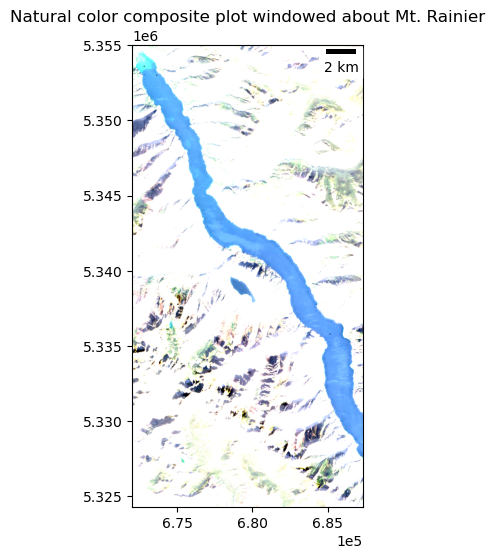

In [22]:
fig, ax = plt.subplots(figsize=(6,6))

ax.imshow(fin, cmap='gray', extent=window_extent)

ax.add_artist(ScaleBar(1.0))
ax.ticklabel_format(scilimits=(1,3))
ax.set_title('Natural color composite plot windowed about Mt. Rainier')
plt.show();

## Let's try to make the water (dark colors) pop

In [58]:
%matplotlib widget

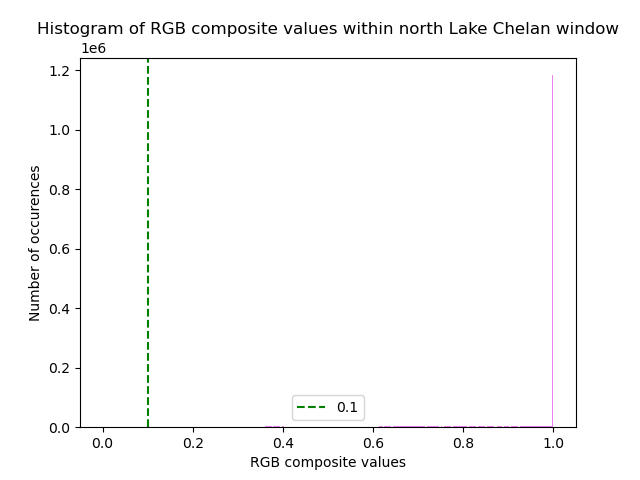

In [59]:
fig, ax = plt.subplots()

w = 0.1

ax.hist(fin.compressed().ravel(), bins=256, color='violet', log=False)

ax.axvline(w, ls='--', c='g', label=w)
ax.legend()
ax.set_ylabel('Number of occurences')
ax.set_xlabel('RGB composite values')
ax.set_title('Histogram of RGB composite values within north Lake Chelan window');

### Create a color-infrared (CIR) composite and plot
* Load the same window from the Near-IR band
* Look up the band combination required here and be careful with order passed to `dstack`
    * http://gsp.humboldt.edu/olm/Courses/GSP_216/lessons/composites.html
* Sanity check: vegetation should appear red
    * Deciduous (leafy) vegetation will appear bright red
    * Coniferous (evergreen) vegetation will appear darker red

In [25]:
# load window from near infared tif file and normalize
mr_nir = rio2ma(nir_fn, b=1, window=window, scale=True)
nir = normie(mr_nir, 2, 98)

# stack bands in proper order
fin_cir = np.dstack((nir,r,g))
#check shape for sanity
fin_cir.shape

(1024, 512, 3)

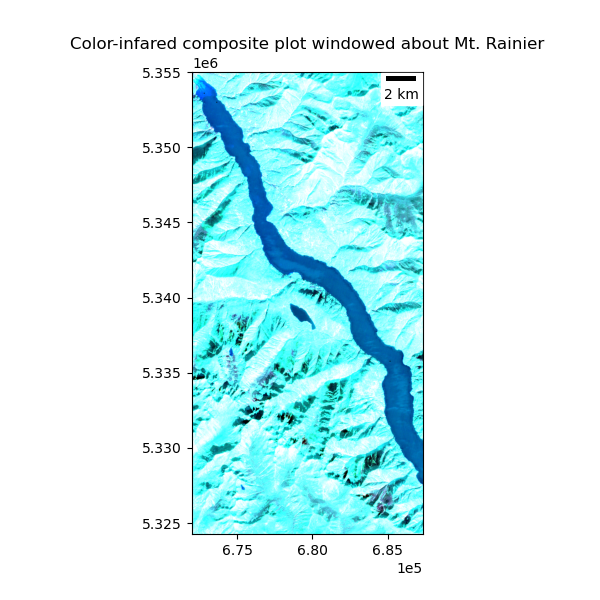

In [26]:
fig, ax = plt.subplots(figsize=(6,6))

ax.imshow(fin_cir, extent=window_extent)

ax.add_artist(ScaleBar(1.0))
ax.ticklabel_format(scilimits=(1,3))
ax.set_title('Color-infared composite plot windowed about Mt. Rainier')
plt.show();

### Create a combined figure with subplots for PAN, RGB composite, and CIR composite
* Use the `plt.subplots()` with appropriate number of rows and columns
    * https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
    * Use the `sharex` and `sharey` options - this will "link" the extent of the three subplots, so if you zoom/pan in one, the others will update to match!
        * Note how extraneous tick labels are dropped here
    * Set an appropriate `figsize` in inches - something like (12,4) might work
* Pass the projected bounds to each imshow `extent` option
* Use `gray` colormap for the PAN, you shouldn't need to specify a colormap for the RGB or CIR
* Add a scalebar to the first plot
* Add appropriate titles to each subplot
* Use `plt.tight_layout()` to clean up axes: https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html

In [27]:
#%matplotlib widget
%matplotlib inline

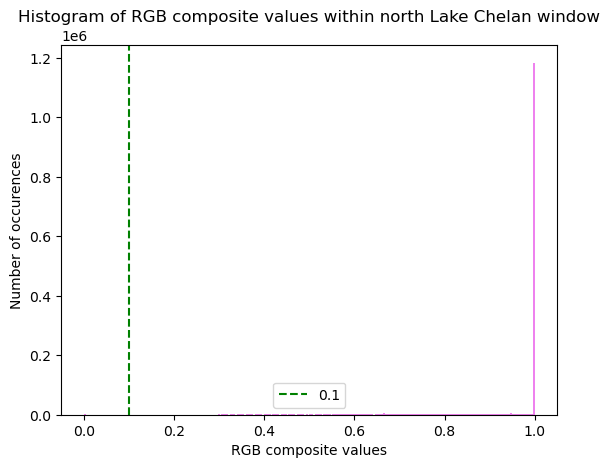

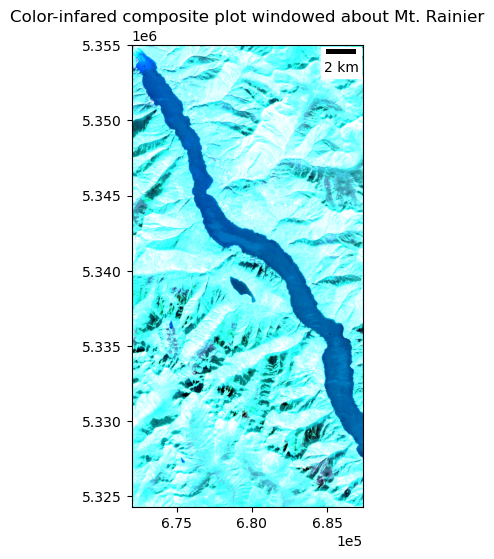

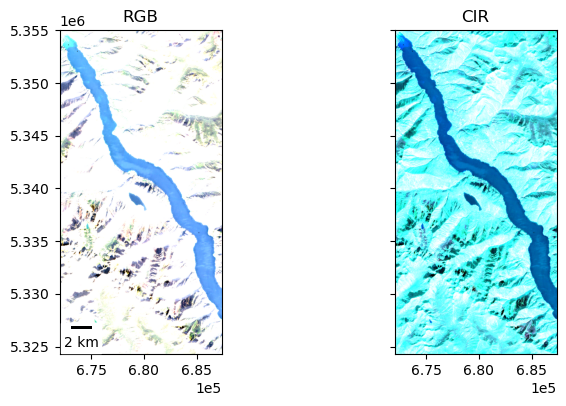

In [28]:
fig, axa = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)

axa[0].imshow(fin, extent=window_extent)
axa[0].set_title('RGB')
axa[0].ticklabel_format(scilimits=(1,3))

axa[0].add_artist(ScaleBar(1.0, location='lower left'))

axa[1].imshow(fin_cir, extent=window_extent)
axa[1].set_title('CIR')
axa[1].ticklabel_format(scilimits=(1,3))

fig.tight_layout(pad=0.5)
plt.show();

## Part 8: Raster band math and index ratios
* Let's use some common band ratios to classify vegetation, snow and water for our window
* NOTE: if you're using `UInt16` masked arrays here, you will want to first convert each to `float`, as some addition/subtraction operations could result in values outside of 0-65536 (e.g., areas that are bright in all visible bands, like snow).
    * Can use `myarray.astype(float)` for this
    * If you don't do this, you will end up with "wrapping" artifacts

In [29]:
#Load and convert the swir channel as well
swir = rio2ma(swir_fn, window=window)

### NDVI (normalized difference vegetation index)
* Resources:
    * https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index
    * https://eos.com/ndvi/
* Create a new array to store the computed NDVI from the bands you've already loaded
* This should be simple - basic raster band math using NumPy arrays
    * Compute the ratio using the original band values (not normalized values)
    * Optional: use `np.ma.clip` to limit the output values to the (-1, 1) range, https://numpy.org/doc/stable/reference/generated/numpy.ma.clip.html
        * Otherwise, explicitly set `vmin=-1, vmax=1` in the imshow calls
* Plot and inspect
    * Plot original ndvi
    * Plot contrast-stretched ndvi using your normalization function above
    * Do you see different NDVI values for dense conifer trees (most of the scene) vs. open meadows or recently logged plots dominated by grass and other deciduous plants?

In [30]:
nir = rio2ma(nir_fn, b=1, window=window, scale=True)
r = rio2ma(r_fn, b=1, window=window, scale=True)

ndvi = (nir - r)/(nir + r)

In [31]:
ndvi = np.ma.clip(ndvi, -1, 1)

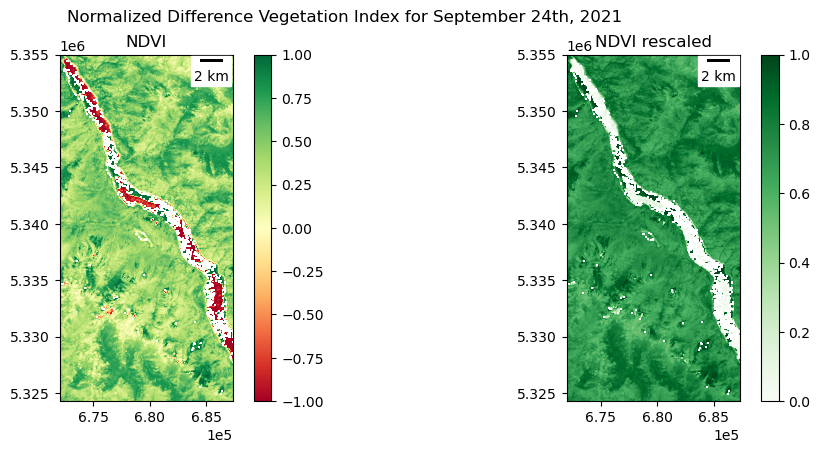

In [32]:
fig, axa = plt.subplots(1, 2, figsize=(12,4.5))

shw0 = axa[0].imshow(ndvi, cmap='RdYlGn', extent=window_extent)
bar = plt.colorbar(shw0)
axa[0].add_artist(ScaleBar(1.0))
axa[0].set_title('NDVI')
axa[0].ticklabel_format(scilimits=(1,3))

shw1 = axa[1].imshow(normie(ndvi, 2, 98), cmap='Greens', extent=window_extent)
bar = plt.colorbar(shw1)
axa[1].add_artist(ScaleBar(1.0))
axa[1].set_title('NDVI rescaled')
axa[1].ticklabel_format(scilimits=(1,3))

fig.suptitle('Normalized Difference Vegetation Index for %s' %date)
plt.show();

### NDSI (normalized difference snow index)
* There are multiple definitions of NDSI in the literature, but let's use this one (using SWIR, since we have it available with LS-8):
    * https://eos.com/ndsi/

In [33]:
swir = rio2ma(swir_fn, b=1, window=window, scale=True)
g = rio2ma(g_fn, b=1, window=window, scale=True)

ndsi = (g - swir) / (g + swir)

In [34]:
ndsi = np.ma.clip(ndsi, -1, 1)

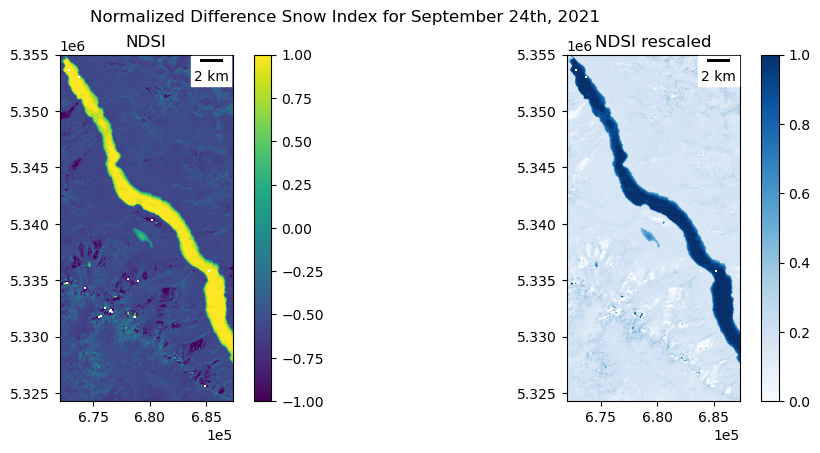

In [35]:
fig, axa = plt.subplots(1, 2, figsize=(12,4.5))

shw0 = axa[0].imshow(ndsi, cmap='viridis', extent=window_extent)
bar = plt.colorbar(shw0)
axa[0].add_artist(ScaleBar(1.0))
axa[0].set_title('NDSI')
axa[0].ticklabel_format(scilimits=(1,3))

shw1 = axa[1].imshow(normie(ndsi, 2, 98), cmap='Blues', extent=window_extent)
bar = plt.colorbar(shw1)
axa[1].add_artist(ScaleBar(1.0))
axa[1].set_title('NDSI rescaled')
axa[1].ticklabel_format(scilimits=(1,3))

fig.suptitle('Normalized Difference Snow Index for %s' %date)
plt.show();

### NDWI (normalized difference water index)
* Again, multiple definitions for different sensors.  Let's use the formula for surface water bodies (not leaves):
    * https://en.wikipedia.org/wiki/Normalized_difference_water_index


In [36]:
#nir = rio2ma(nir_fn, b=1, window=window, scale=True)
#g = rio2ma(g_fn, b=1, window=window, scale=True)
ndwi = (g - nir) / (g + nir)



In [37]:
ndwi = np.ma.clip(ndwi, -1, 1)

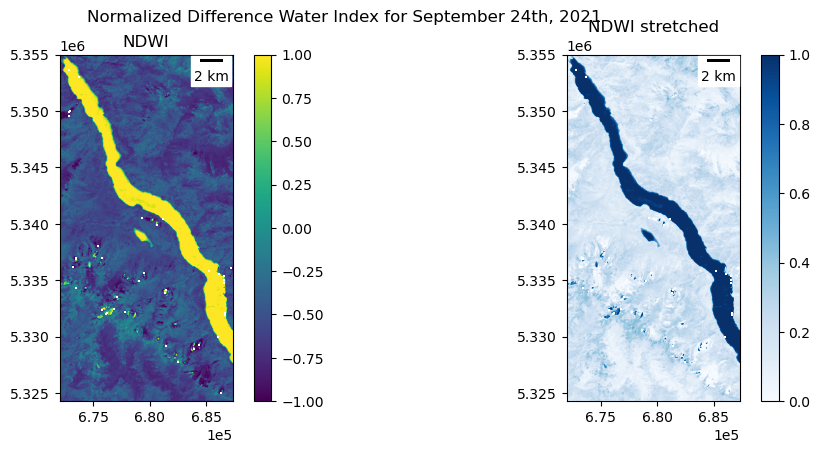

In [38]:
fig, axa = plt.subplots(1, 2, figsize=(12,4.5))

shw0 = axa[0].imshow(ndwi, cmap='viridis', extent=window_extent)
bar = plt.colorbar(shw0)
axa[0].add_artist(ScaleBar(1.0))
axa[0].set_title('NDWI')
axa[0].ticklabel_format(scilimits=(1,3))

shw1 = axa[1].imshow(normie(ndwi, 2, 98), cmap='Blues', extent=window_extent)
bar = plt.colorbar(shw1)
axa[1].add_artist(ScaleBar(1.0))
axa[1].set_title('NDWI stretched')
axa[1].ticklabel_format(scilimits=(1,3))

fig.suptitle('Normalized Difference Water Index for %s' %date)
plt.show();

### NDSSI (normalized difference suspended sediment index)
[11] Hossain et al


In [39]:
#nir = rio2ma(nir_fn, b=1, window=window, scale=True)
#g = rio2ma(g_fn, b=1, window=window, scale=True)
ndssi = (b - nir) / (b + nir)

In [40]:
ndssi = np.ma.clip(ndssi, -1, 1)

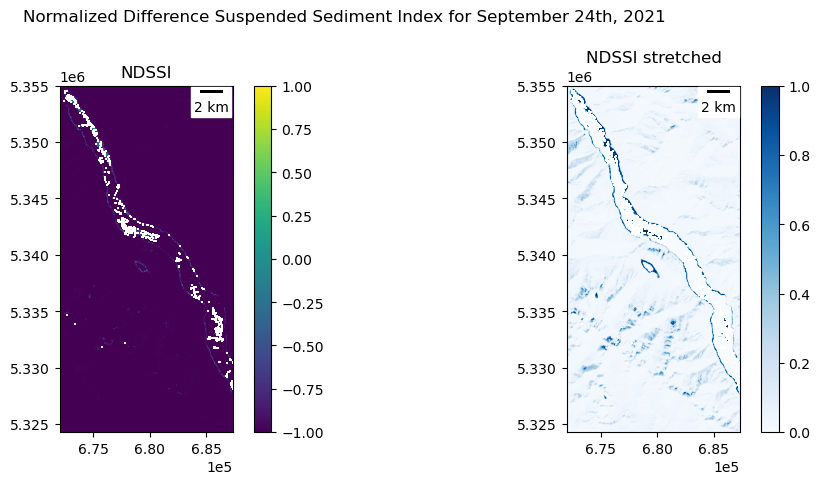

In [41]:
fig, axa = plt.subplots(1, 2, figsize=(12,4.5))

shw0 = axa[0].imshow(ndssi, cmap='viridis', extent=window_extent)
bar = plt.colorbar(shw0)
axa[0].add_artist(ScaleBar(1.0))
axa[0].set_title('NDSSI')
axa[0].ticklabel_format(scilimits=(1,3))

shw1 = axa[1].imshow(normie(ndssi, 2, 98), cmap='Blues', extent=window_extent)
bar = plt.colorbar(shw1)
axa[1].add_artist(ScaleBar(1.0))
axa[1].set_title('NDSSI stretched')
axa[1].ticklabel_format(scilimits=(1,3))

fig.suptitle('Normalized Difference Suspended Sediment Index for %s' %date, y=1.05)

plt.show();

### NDTI (normalized difference turbidity index)
[4] C. Baughman et al


In [42]:
#%matplotlib widget
%matplotlib inline

In [43]:
#nir = rio2ma(nir_fn, b=1, window=window, scale=True)
#g = rio2ma(g_fn, b=1, window=window, scale=True)
ndti = (r - g) / (r + g)

In [44]:
ndti = np.ma.clip(ndti, -1, 1)

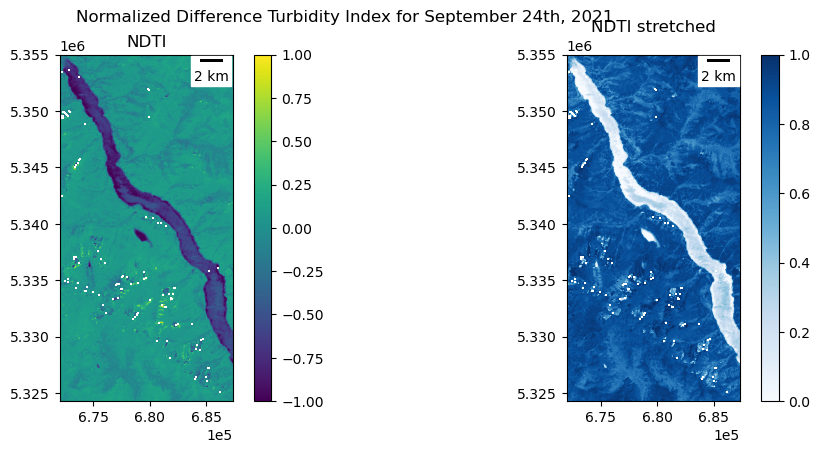

In [45]:
fig, axa = plt.subplots(1, 2, figsize=(12,4.5))

shw0 = axa[0].imshow(ndti, cmap='viridis', extent=window_extent)
bar = plt.colorbar(shw0)
axa[0].add_artist(ScaleBar(1.0))
axa[0].set_title('NDTI')
axa[0].ticklabel_format(scilimits=(1,3))

shw1 = axa[1].imshow(normie(ndti, 2, 98), cmap='Blues', extent=window_extent)
bar = plt.colorbar(shw1)
axa[1].add_artist(ScaleBar(1.0))
axa[1].set_title('NDTI stretched')
axa[1].ticklabel_format(scilimits=(1,3))

fig.suptitle('Normalized Difference Turbidity Index for %s' %date)
plt.show();

### Extra Credit: create a figure with linked RGB, CIR, NDVI, NDSI, and NDWI products
* Use the pan/zoom functionality of `%matplotlib widget` to explore the scene a bit
    * Zoom in on some vegetation, snow near the summit, and surface water like Mowich Lake (https://goo.gl/maps/V6YFJQPcfrDi9UXH6)
* Note how the different indices change (see interactive values for cursor position on each subplot), which should hopefully provide better sense of what the different indices are showing

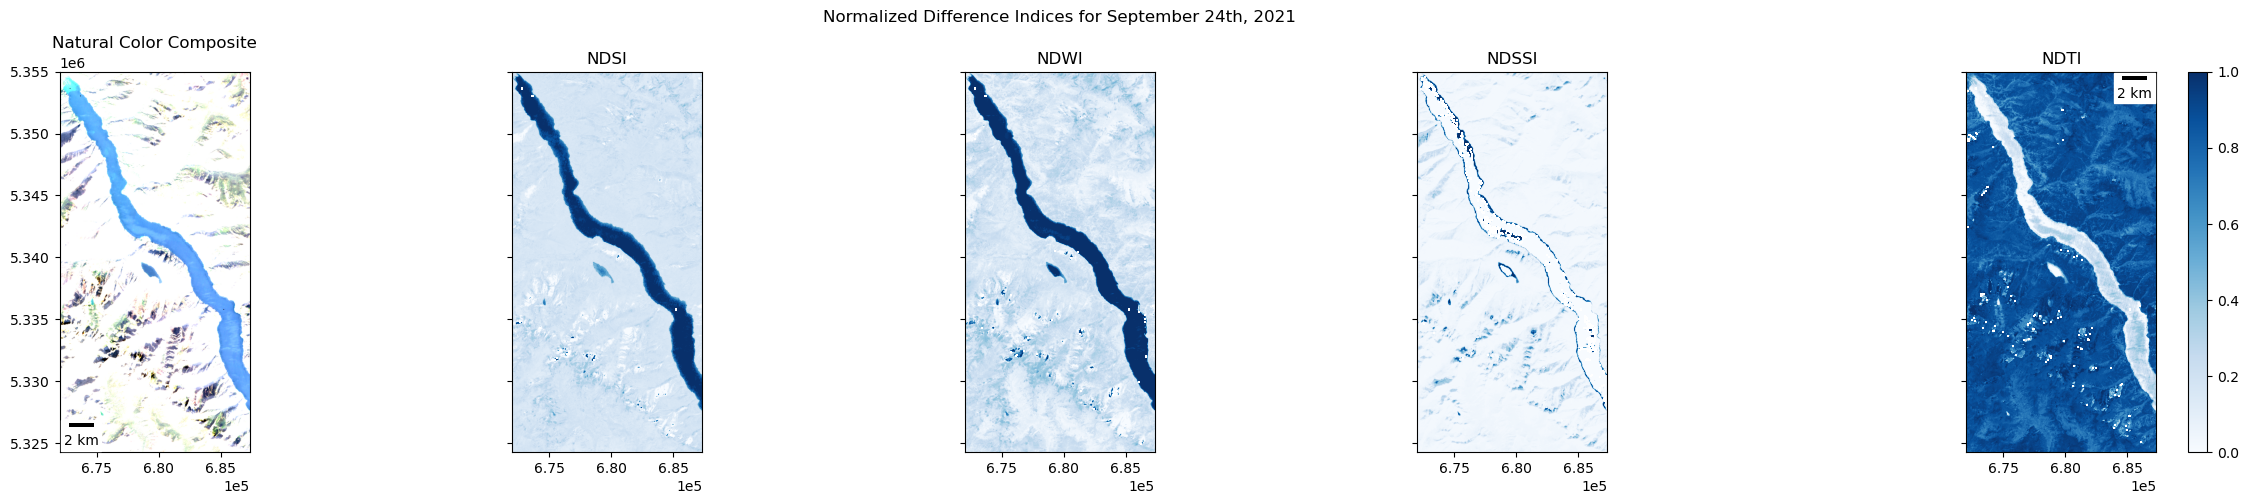

In [46]:
fig, axa = plt.subplots(1, 5, figsize=(24,4), sharex=True, sharey=True)

axa[0].imshow(fin, cmap='gray', extent=window_extent)
axa[0].set_title('Natural Color Composite')
axa[0].ticklabel_format(scilimits=(1,3))
axa[0].add_artist(ScaleBar(1.0, location='lower left'))

axa[1].imshow(normie(ndsi, 2, 98), cmap='Blues', extent=window_extent)
axa[1].set_title('NDSI')
axa[1].ticklabel_format(scilimits=(1,3))

axa[2].imshow(normie(ndwi, 2, 98), cmap='Blues', extent=window_extent)
axa[2].set_title('NDWI')
axa[2].ticklabel_format(scilimits=(1,3))

axa[3].imshow(normie(ndssi, 2, 98), cmap='Blues', extent=window_extent)
axa[3].set_title('NDSSI') #Hossain et al
axa[3].ticklabel_format(scilimits=(1,3))

shw1 = axa[4].imshow(normie(ndti, 2, 98), cmap='Blues', extent=window_extent)
bar = plt.colorbar(shw1)
axa[4].add_artist(ScaleBar(1.0))
axa[4].set_title('NDTI') #Baughman et al
axa[4].ticklabel_format(scilimits=(1,3))

fig.suptitle('Normalized Difference Indices for %s' %date, y=1.15)
fig.tight_layout(pad=-1.75)
plt.locator_params(axis='x', nbins=4)
plt.show();

# NOTE: not sure why but..
# nbins=1,2,3 gives 2 ticks,
# nbins=4,5,6 gives 3 ticks,
# nbins=7,8 gives 7 and 8 ticks as expected.
#https://stackoverflow.com/questions/6682784/reducing-number-of-plot-ticks

## Part 9: Raster Classification Using Threshold
### Create a binary suspended solids mask
* Need to define a cutoff value (threshold) for NDVI values to define a boolean vegetation mask
    * NDVI values above this threshold will be classified as "vegetation"
    * NDVI values below this threshold will be classified as "not vegetation"
    * This might be a useful resource: https://eos.com/ndvi/
* To decide on a threshold, probably useful review your NDVI plot above and maybe create plot a histogram of NDVI values
* Output mask should be boolean (True/False)
    * Should be true (1) for vegetation pixels and false (0) for all other pixels
* Create a figure with two subplots to show the NDVI map and your corresponding vegetation mask

In [47]:
w = 0.25

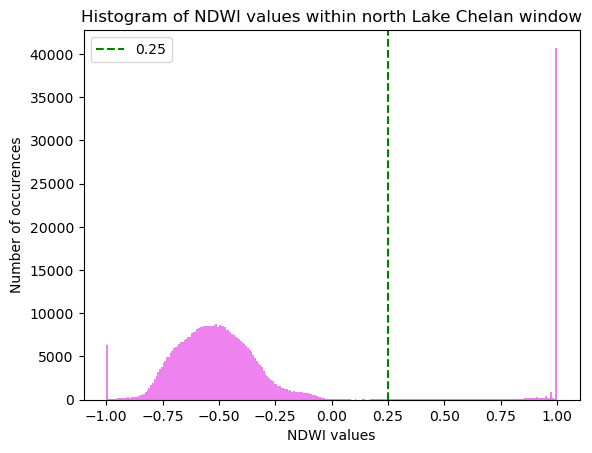

In [48]:
fig, ax = plt.subplots()

ax.hist(ndwi.compressed().ravel(), bins=256, color='violet', log=False)

ax.axvline(w, ls='--', c='g', label=w)
ax.legend()
ax.set_ylabel('Number of occurences')
ax.set_xlabel('NDWI values')
ax.set_title('Histogram of NDWI values within north Lake Chelan window');

In [49]:
import matplotlib.patches as mpatches #for legend

In [50]:
ndwi_mask = np.ma.masked_less(ndwi, w)

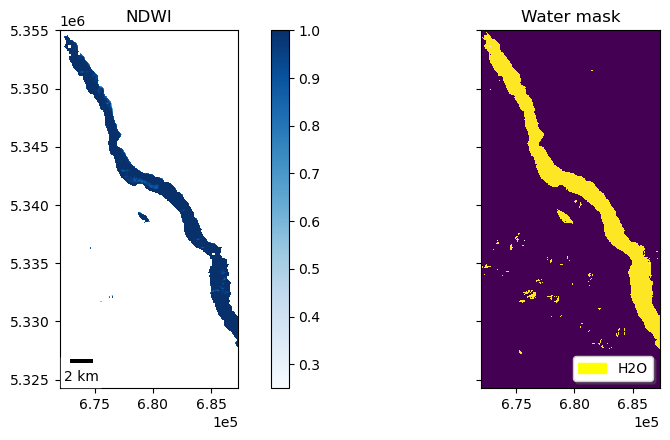

In [51]:
fig, axa = plt.subplots(1, 2, figsize=(12,4.5), sharex=True, sharey=True)

ndwi_wat = ndwi>= w

shw0 = axa[0].imshow(ndwi_mask, cmap='Blues', extent=window_extent)
bar = plt.colorbar(shw0)
axa[0].add_artist(ScaleBar(1.0, location='lower left'))
axa[0].set_title('NDWI')
axa[0].ticklabel_format(scilimits=(1,3))

shw1 = axa[1].imshow(ndwi_wat, extent=window_extent, interpolation='none')
axa[1].set_title('Water mask')
axa[1].ticklabel_format(scilimits=(1,3))

veg_legend = mpatches.Patch(color='yellow', label='H2O')
axa[1].legend(handles=[veg_legend], loc='lower right', shadow=True, fancybox=True)
#https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

plt.tight_layout()
plt.show();

In [52]:
ndti_masked = np.ma.masked_where(ndwi_mask==1, ndti)

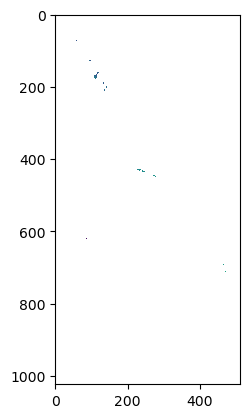

In [53]:
plt.imshow(ndti_masked, vmin=-1, vmax=0);

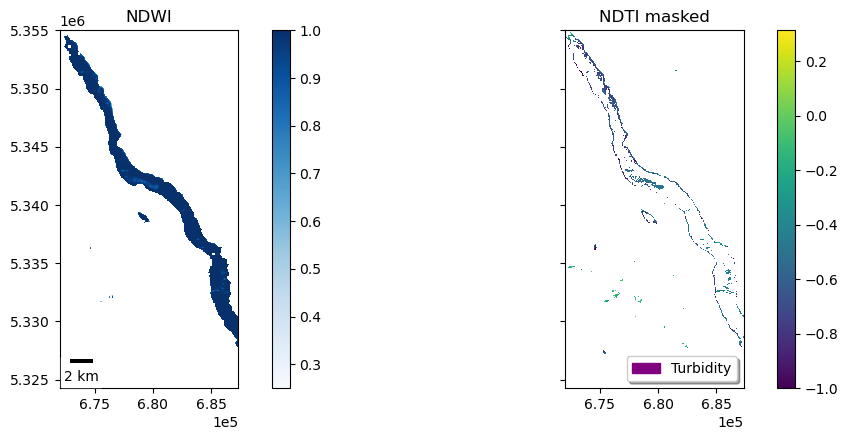

In [54]:
fig, axa = plt.subplots(1, 2, figsize=(12,4.5), sharex=True, sharey=True)

ndwi_wat = ndwi>= w

shw0 = axa[0].imshow(ndwi_mask, cmap='Blues', extent=window_extent)
bar = plt.colorbar(shw0)
axa[0].add_artist(ScaleBar(1.0, location='lower left'))
axa[0].set_title('NDWI')
axa[0].ticklabel_format(scilimits=(1,3))

shw1 = axa[1].imshow(ndti_masked, extent=window_extent, interpolation='none')
bar = plt.colorbar(shw1)
axa[1].set_title('NDTI masked')
axa[1].ticklabel_format(scilimits=(1,3))

veg_legend = mpatches.Patch(color='purple', label='Turbidity')
axa[1].legend(handles=[veg_legend], loc='lower right', shadow=True, fancybox=True)
#https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

plt.tight_layout()
plt.show();

In [55]:
import pandas as pd
from ipywidgets import HBox, VBox, Label, Layout


import arcgis
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.raster.analytics import convert_feature_to_raster, convert_raster_to_feature
from arcgis.raster.functions import extract_band, greater_than, clip, remap, colormap, stretch
from arcgis.features.analysis import dissolve_boundaries

ModuleNotFoundError: No module named 'arcgis'

In [ ]:
def create_binary_raster(ndwi_lyr, t):
    print('creating binary raster',end='\r')
    binary_raster = greater_than([ndwi_lyr, 0.03], 
                              extent_type='FirstOf', 
                              cellsize_type='FirstOf', 
                              astype='U16')
    binary_ras = binary_raster.save("binaryrast_"+t, gis=ent_gis)
    binaryras_lyr = binary_ras.layers[0]
    return binaryras_lyr

In [ ]:
t = 'datetime'

create_binary_raster(ndwi_wat, t)

## FIRST ATTEMPT

In [ ]:
#%matplotlib widget
%matplotlib inline

In [ ]:
fig, ax = plt.subplots()

v = .975

ax.hist(ndssi.compressed().ravel(), bins=256, color='violet', log=False)

ax.axvline(v, ls='--', c='g', label=v)
ax.legend()
ax.set_ylabel('Number of occurences')
ax.set_xlabel('NDSSI values')
ax.set_title('Histogram of NDSSI values within north Lake Chelan window');

In [ ]:
# set threshold for NDSSI according to histogram
ndssi_till = ndssi>=1

In [ ]:
fig, axa = plt.subplots(1, 2, figsize=(12,4.5), sharex=True, sharey=True)

shw0 = axa[0].imshow(normie(ndssi, 2, 98), cmap='Blues', extent=window_extent)
bar = plt.colorbar(shw0)
axa[0].add_artist(ScaleBar(1.0, location='lower left'))
axa[0].set_title('NDSSI')
axa[0].ticklabel_format(scilimits=(1,3))

shw1 = axa[1].imshow(ndssi_till, extent=window_extent, interpolation='none')
axa[1].set_title('Glacial till turbidity mask')
axa[1].ticklabel_format(scilimits=(1,3))

veg_legend = mpatches.Patch(color='yellow', label='till')
axa[1].legend(handles=[veg_legend], loc='upper right', shadow=True, fancybox=True)
#https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

plt.tight_layout()
plt.show();

# NOTE: be sure to set interpolation to none when attempting binary mask

### Create a binary turbidity mask

In [ ]:
t1 = -0.5
t2 = -0.4

In [ ]:
fig, ax = plt.subplots()

ax.hist(ndti.compressed().ravel(), bins=256, color='violet', log=False)

ax.axvline(t1, ls='--', c='g', label=t1)
ax.axvline(t2, ls='--', c='g', label=t2)
ax.set_ylabel('Number of occurences')
ax.set_xlabel('NDTI values')
ax.legend()
ax.set_title('Histogram of NDTI values within north Lake Chelan window');


# Is there a more quantitative way of determining thresholds?

In [ ]:
# setting turbidity mask
ndti_turb = ndti[(ndti<=t2) & (ndti>=t1)]

In [ ]:
#plotting NDTI alongside turbidity mask
fig, axa = plt.subplots(1, 2, figsize=(12,4.5), sharex=True, sharey=True)

shw0 = axa[0].imshow(normie(ndti, 2, 98), cmap='Blues', vmin=0, vmax=1, extent=window_extent)
bar = plt.colorbar(shw0)
axa[0].add_artist(ScaleBar(1.0, location='lower left'))
axa[0].set_title('NDTI')
axa[0].ticklabel_format(scilimits=(1,3))

shw1 = axa[1].imshow(ndti_turb, extent=window_extent, interpolation='none', label='snow')
axa[1].set_title('Glacial till turbidity mask')
axa[1].ticklabel_format(scilimits=(1,3))

turb_legend = mpatches.Patch(color='yellow', label='turbidity')
axa[1].legend(handles=[turb_legend], loc='lower right', shadow=True, fancybox=True)

plt.tight_layout()
plt.show();

## Using NDWI mask (water) to isolate lake geometry

In [ ]:
whidbey_ma, whidbey_out_transform = rio.mask.mask(src_proj, [whidbey_geom,], **rio_mask_kwargs)
whidbey_ma_extent = rio.plot.plotting_extent(whidbey_ma, whidbey_out_transform)

In [ ]:
whidbey_ma_extent

### Create a plot of clipped Whidbey DEM
* Verify that you have a masked array of elevation values, with unmasked values only over the Whidbey polygon
* Extra credit: add hillshade, colorbar and scalebar

In [ ]:
whidbey_ma

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wa_hs, extent=hs_extent, cmap='gray')
m = ax.imshow(whidbey_ma, cmap='inferno', extent=whidbey_ma_extent, alpha=0.5)

ax.add_artist(ScaleBar(1.0))

cb = fig.colorbar(m, ax=ax, pad=0.01)
cb.set_label('Elevation (m)')

plt.title('Whidbey Island in full')
plt.tight_layout();

## Part 10: Raster Area Calculation

### Use your snow mask to estimate the area (km<sup>2</sup>) covered by snow
* You will need to count the number of True (1) values in your boolean snow mask
* Think about this for a moment
* Remember, that your raster is a regular grid, and you know the dimensions of each grid cell in meters
    * Start by calculating the area covered by an indvidual pixel in square meters
    * Count the number of pixels classified as snow in your boolean snow mask
        * A few ways to approach this - the values we are interesed in are all set to 1, and everything else is 0, maybe a sum would work?  Or maybe count the number of nonzero values?
    * Multiply the two!
* Sanity check: make sure your estimate is consistent with expected dimensions for Mt. Rainier and your window dimensions (~30 x 30 km)
    * Hint: Snow-covered area of ~60-70 km<sup>2</sup> seems reasonable
* *Note: Based on what we learned in our earlier lab on CRS/projections, this calculation should really be done using an equal-area projection. Fine to estimate with default UTM projection here, and we will cover raster reprojection in the Raster2 lab.*

In [ ]:
ndsi_sno

In [ ]:
truths = ndsi_sno.sum()
snow = truths * 0.03 * 0.03
print('snowcover: ~%.0f km^2' %snow)
